In [ ]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [2]:
data = pd.read_csv('/home/vignesh/Downloads/bank-additional/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index
original_data = data
# first_quadrant = original_data[(original_data.month == 'mar') | (original_data.month == 'apr')]
# second_quadrant = original_data[(original_data.month == 'mar') & (original_data.month == 'apr')]
# third_quadrant = original_data[(original_data.month == 'mar') & (original_data.month == 'apr')]

data[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,2
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,6
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,7
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,8
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,9


In [5]:
# original_data[(original_data.default == 'unknown') & (original_data.housing == 'unknown') & (original_data.loan == 'unknown')]

In [4]:
count_row_unknown = 0
id = []
for i in range(len(original_data)-1):
    count_unknown = 0
    for j in range(20):
        if original_data.iloc[i][j]=='unknown':
            count_unknown += 1
    if count_unknown>=3:
        count_row_unknown += 1
        id.append(original_data.iloc[i]['id'])
print(count_row_unknown)

328


In [101]:
filtered_data_1 = original_data[~original_data['id'].isin(id)]
filtered_data_2 = filtered_data_1[~((filtered_data_1.pdays==999) & (filtered_data_1.poutcome=='failure'))]
filtered_data_temp = filtered_data_2

In [45]:
filtered_data_2.to_csv('/home/vignesh/Documents/MachineLearningProject/bank-additional-filtered.csv',header=1)

In [56]:
len(filtered_data_2[filtered_data_2['loan']=='unknown'])

649

In [41]:
len(filtered_data_1[(filtered_data_1.pdays==999) & (filtered_data_1.poutcome=='failure')])

4092

In [59]:
len(filtered_data_2[((filtered_data_2.housing=='yes') & (filtered_data_2.loan=='yes'))])

3307

In [75]:
len(original_data[original_data['loan']=='unknown'])

990

In [73]:
len(original_data[((original_data.housing=='no') & (original_data.loan=='no'))])

16065

In [104]:
filtered_data_temp[['loan','housing','y']].groupby(['loan','housing','y']).size()

loan     housing  y  
no       no       no     13012
                  yes     1549
         yes      no     14091
                  yes     1847
unknown  unknown  no       573
                  yes       76
yes      no       no      2067
                  yes      246
         yes      no      2934
                  yes      373
dtype: int64

In [97]:
len(filtered_data_2[filtered_data_2['y']==1])

4091

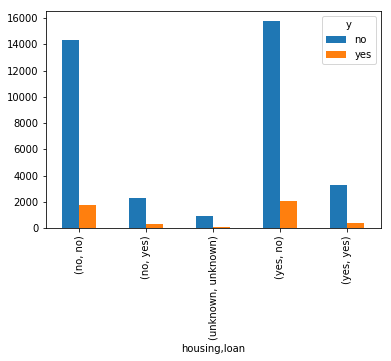

In [94]:
val = original_data[['housing','loan','y']].groupby(['housing','loan','y']).size().unstack()
val.plot.bar()

In [ ]:
len(filtered_data_1[~((filtered_data_1.pdays==999) & (filtered_data_1.poutcome=='failure'))])

In [86]:
import matplotlib.pyplot as plt

In [99]:
loan_val = filtered_data[['marital','y']].groupby(['marital','y']).size().unstack()

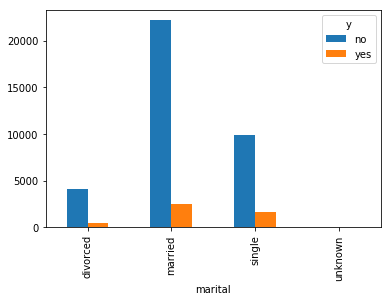

In [100]:
loan_val.plot.bar()

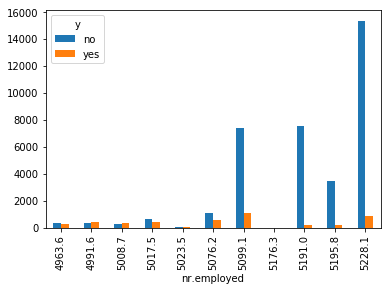

In [6]:
loan_val.plot(kind = "bar")

In [64]:
original_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [65]:
len(original_data[original_data['pdays']==999])

39673

In [82]:
# filtered_data[['pdays','poutcome']].groupby(['pdays','poutcome']).size()

In [7]:
plot_x_y = original_data[['loan','y']].groupby(['loan','y']).size().unstack()

In [83]:
# print(filtered_data[['month','housing','y']].groupby(['month','housing','y']).size())

In [43]:
temp = original_data[['campaign','loan','y']].groupby(['campaign','loan','y']).size()
temp.to_csv("temp.csv",header=1)

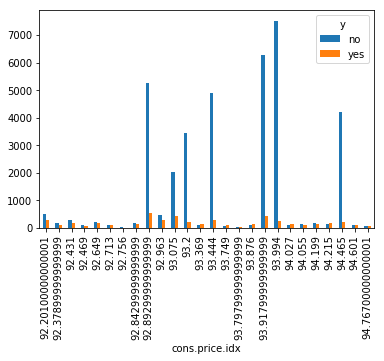

In [45]:
plot_x_y = original_data[['cons.price.idx','y']].groupby(['cons.price.idx','y']).size().unstack()
plot_x_y.plot(kind = "bar")

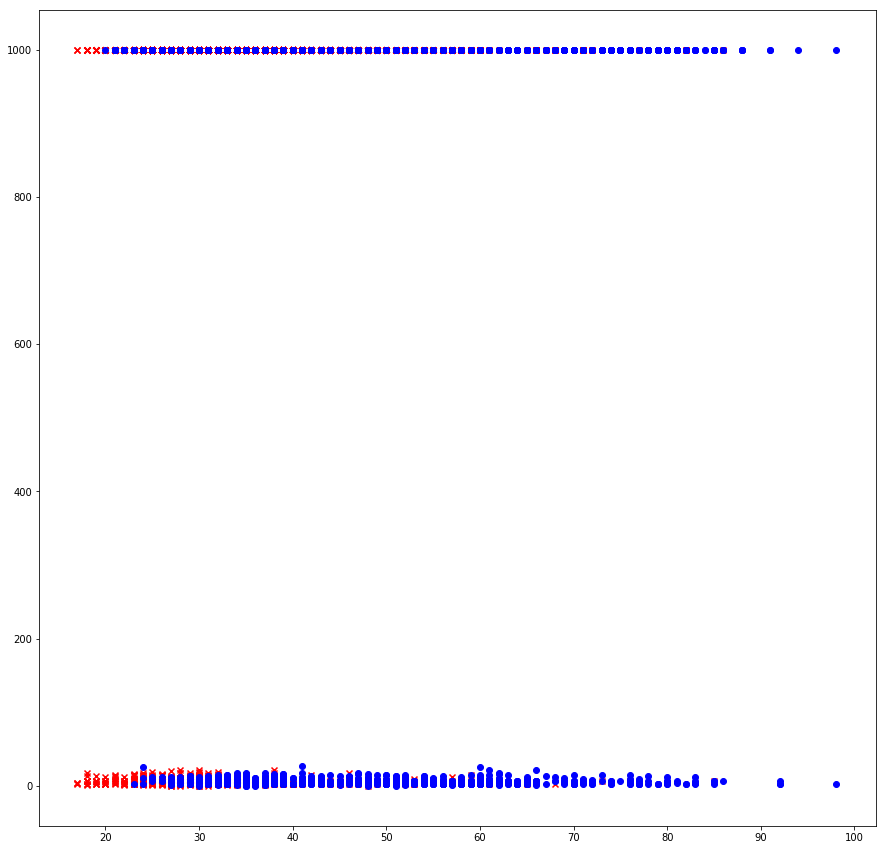

In [120]:

single = original_data[original_data['marital']=='single']
married = original_data[original_data['marital']=='married']
# single = single[single['pdays']==999]
# married = married[married['pdays']==999]


fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111)

# axes = plt.figure(figsize=(15,15))
axes.scatter(single['age'], single['pdays'],c='red', marker='x')
axes.scatter(married['age'], married['pdays'],c='blue')

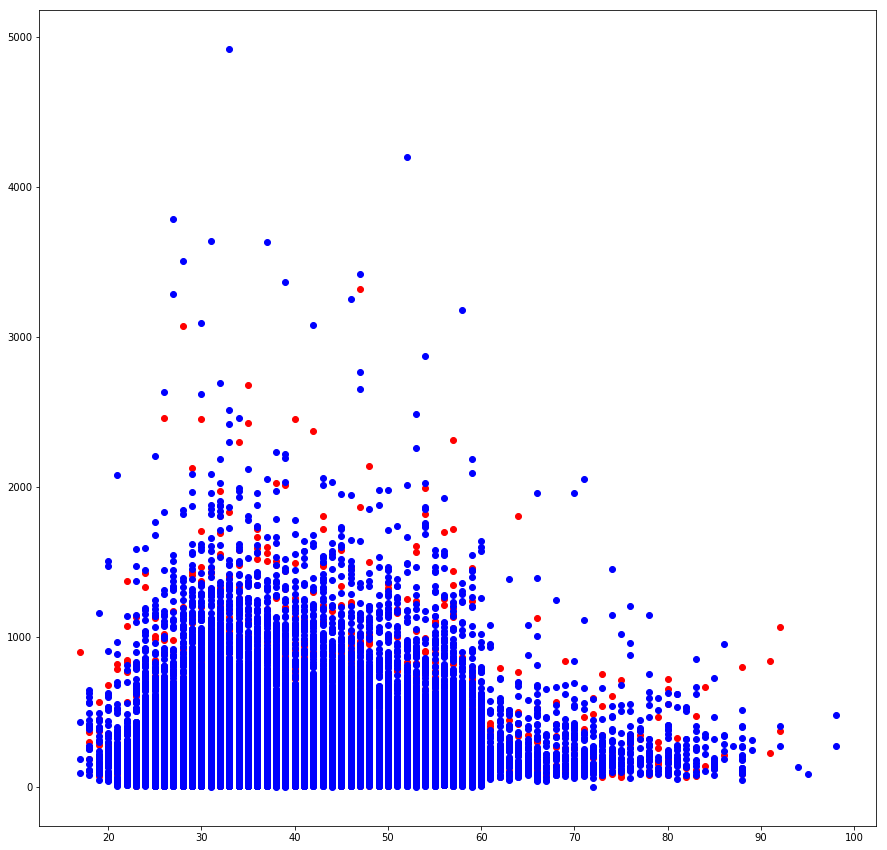

In [94]:

loan_yes = original_data[original_data['loan']=='yes']
loan_no = original_data[original_data['loan']=='no']
# single = single[single['pdays']==999]
# married = married[married['pdays']==999]


fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111)

# axes = plt.figure(figsize=(15,15))
axes.scatter(loan_yes['age'], loan_yes['duration'],c='red')
axes.scatter(loan_no['age'], loan_no['duration'],c='blue')

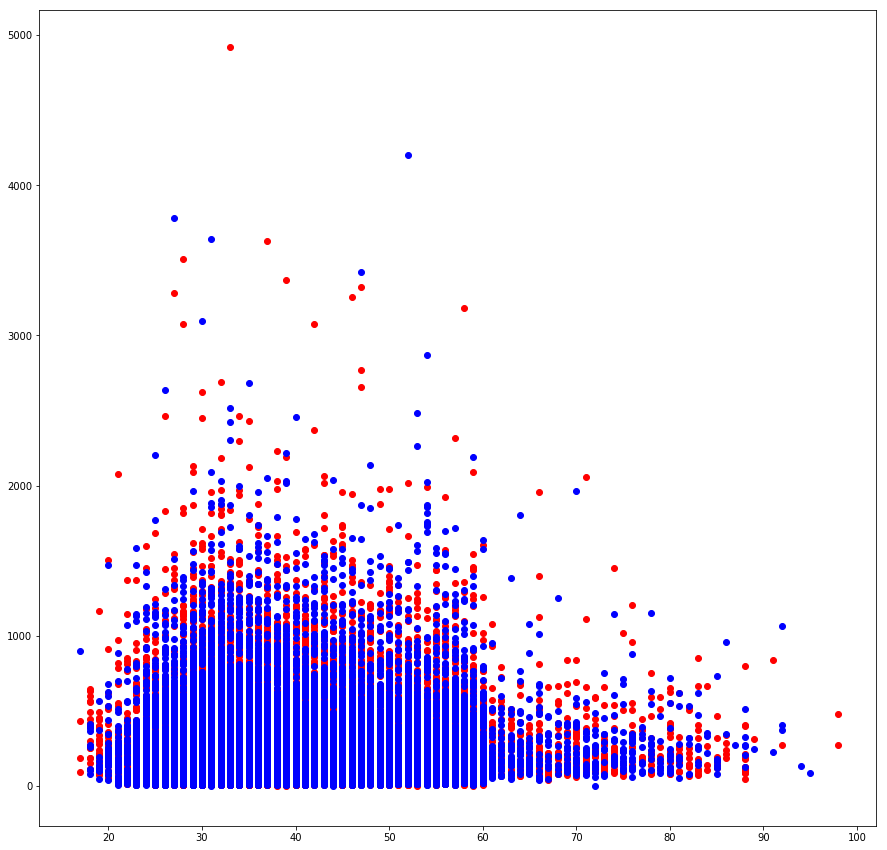

In [96]:
housing_yes = original_data[original_data['housing']=='yes']
housing_no = original_data[original_data['housing']=='no']
# single = single[single['pdays']==999]
# married = married[married['pdays']==999]


fig = plt.figure(figsize=(15,15))
axes = fig.add_subplot(111)

# axes = plt.figure(figsize=(15,15))
axes.scatter(housing_yes['age'], housing_yes['duration'],c='red')
axes.scatter(housing_no['age'], housing_no['duration'],c='blue')

In [97]:
original_data['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [33]:
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    data[c], label_mapping[c] = pd.factorize(data[c])

In [4]:
data[0:10]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,0,2,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1,0,0,1,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
5,45,1,0,3,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
6,59,2,0,4,0,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
7,41,3,0,5,1,0,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
8,24,4,1,4,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
9,25,1,1,1,0,1,0,0,0,0,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [79]:
char_cols = data.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    filtered_data_2[c], label_mapping[c] = pd.factorize(filtered_data_2[c])

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [80]:
correlation = filtered_data_2.corr(method='pearson')

In [91]:
from scipy.stats import pearsonr
pearsonr(filtered_data_2['housing'],filtered_data_2['loan'])

(0.24073181602682311, 0.0)

In [109]:
bank_client_corr = filtered_data_2[['age','job','marital','education','default','housing','loan']]

In [111]:
char_cols = bank_client_corr.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    bank_client_corr[c], label_mapping[c] = pd.factorize(bank_client_corr[c])

In [112]:
bank_client_corr.corr(method='pearson')

,age,job,marital,education,default,housing,loan
age,1.000000,0.029420,-0.112703,-0.095780,0.170768,-0.007426,-0.014322
job,0.029420,1.000000,-0.009958,0.159962,-0.020672,0.006690,-0.006110
marital,-0.112703,-0.009958,1.000000,0.066538,-0.106133,0.007569,0.006229
education,-0.095780,0.159962,0.066538,1.000000,-0.148095,0.017041,0.007469
default,0.170768,-0.020672,-0.106133,-0.148095,1.000000,-0.038231,-0.041759
housing,-0.007426,0.006690,0.007569,0.017041,-0.038231,1.000000,0.240732
loan,-0.014322,-0.006110,0.006229,0.007469,-0.041759,0.240732,1.000000


In [113]:
other_attributes = filtered_data_2[['campaign','pdays','previous','poutcome']]
char_cols = other_attributes.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    other_attributes[c], label_mapping[c] = pd.factorize(other_attributes[c])

/home/vignesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
other_attributes.corr(method='pearson')

,campaign,pdays,previous,poutcome
campaign,1.000000,0.058365,-0.050557,-0.055491
pdays,0.058365,1.000000,-0.867029,-0.964481
previous,-0.050557,-0.867029,1.000000,0.876321
poutcome,-0.055491,-0.964481,0.876321,1.000000


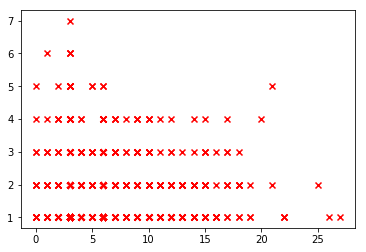

In [135]:
import matplotlib.pyplot as plt
filtered_data_remove_999 = filtered_data_2[filtered_data_2['pdays']!=999]
plt.scatter(filtered_data_remove_999['pdays'],filtered_data_remove_999['previous'], marker='x', c='red')

In [136]:
filtered_data_remove_999.corr(method='pearson')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,id
age,1.000000,-0.014925,0.005688,-0.069734,0.015149,-0.054135,-0.022954,0.086213,-0.046224,-0.045358,0.040283
duration,-0.014925,1.000000,-0.020982,0.077503,-0.004518,0.077622,0.087460,-0.105649,-0.015247,-0.032986,0.001301
campaign,0.005688,-0.020982,1.000000,0.045763,0.000669,0.058204,0.031910,-0.051248,0.038640,0.014080,-0.018436
pdays,-0.069734,0.077503,0.045763,1.000000,-0.040055,0.153396,0.172468,-0.083145,-0.081586,-0.137094,0.119021
previous,0.015149,-0.004518,0.000669,-0.040055,1.000000,0.191319,0.354566,-0.069723,-0.172359,-0.371968,0.331762
emp.var.rate,-0.054135,0.077622,0.058204,0.153396,0.191319,1.000000,0.781264,-0.730685,0.424540,-0.131875,-0.069219
cons.price.idx,-0.022954,0.087460,0.031910,0.172468,0.354566,0.781264,1.000000,-0.574498,-0.056389,-0.654706,0.455718
cons.conf.idx,0.086213,-0.105649,-0.051248,-0.083145,-0.069723,-0.730685,-0.574498,1.000000,-0.370784,-0.088413,0.264439
euribor3m,-0.046224,-0.015247,0.038640,-0.081586,-0.172359,0.424540,-0.056389,-0.370784,1.000000,0.671022,-0.750201
nr.employed,-0.045358,-0.032986,0.014080,-0.137094,-0.371968,-0.131875,-0.654706,-0.088413,0.671022,1.000000,-0.896834


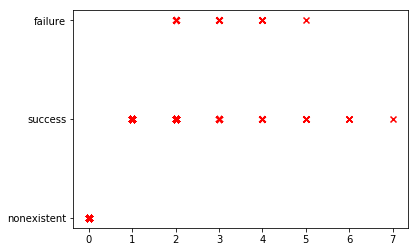

In [138]:
plt.scatter(filtered_data_2['previous'],filtered_data_2['poutcome'], marker='x', c='red')

In [141]:
filtered_data_remove_previous_0 = other_attributes[other_attributes['previous']!=0]

In [142]:
filtered_data_remove_previous_0.corr(method='pearson')

,campaign,pdays,previous,poutcome
campaign,1.000000,0.045763,0.000669,0.034857
pdays,0.045763,1.000000,-0.040055,0.347096
previous,0.000669,-0.040055,1.000000,0.304162
poutcome,0.034857,0.347096,0.304162,1.000000


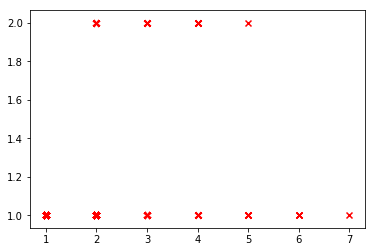

In [143]:
plt.scatter(filtered_data_remove_previous_0['previous'],filtered_data_remove_previous_0['poutcome'], marker='x', c='red')

In [115]:
social_economic_attr = filtered_data_2[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
char_cols = social_economic_attr.dtypes.pipe(lambda x: x[x == 'object']).index
label_mapping = {}

for c in char_cols:
    social_economic_attr[c], label_mapping[c] = pd.factorize(social_economic_attr[c])

In [116]:
social_economic_attr.corr(method='pearson')

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.766058,0.189144,0.973121,0.910769
cons.price.idx,0.766058,1.000000,0.033243,0.684748,0.527351
cons.conf.idx,0.189144,0.033243,1.000000,0.268141,0.090654
euribor3m,0.973121,0.684748,0.268141,1.000000,0.945520
nr.employed,0.910769,0.527351,0.090654,0.945520,1.000000


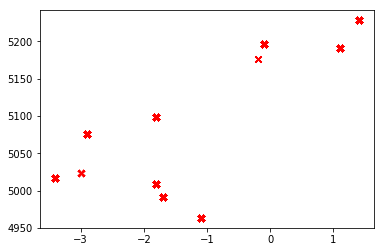

In [127]:
import matplotlib.pyplot as plt
plt.scatter(filtered_data_2['emp.var.rate'],filtered_data_2['nr.employed'], marker='x', c='red')

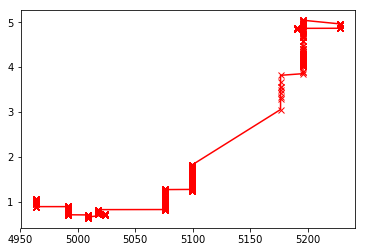

In [132]:
plt.plot(filtered_data_2['nr.employed'],filtered_data_2['euribor3m'], marker='x', c='red')

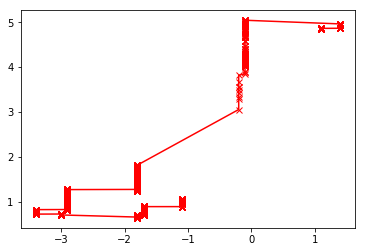

In [131]:
plt.plot(filtered_data_2['emp.var.rate'],filtered_data_2['euribor3m'], marker='x', c='red')

In [40]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(correlation)

                     age       job   marital  education   default   housing  \
age             1.000000  0.030413 -0.114983  -0.091900  0.164965 -0.001923   
job             0.030413  1.000000 -0.008109   0.164598 -0.012669  0.005750   
marital        -0.114983 -0.008109  1.000000   0.063774 -0.103930  0.007436   
education      -0.091900  0.164598  0.063774   1.000000 -0.144138  0.013023   
default         0.164965 -0.012669 -0.103930  -0.144138  1.000000 -0.011051   
housing        -0.001923  0.005750  0.007436   0.013023 -0.011051  1.000000   
loan           -0.006397 -0.004950  0.001719   0.001887  0.000970  0.289759   
contact        -0.007021  0.017054  0.043564   0.095383 -0.135238  0.065393   
month           0.083423  0.076486  0.020613   0.114478 -0.135510  0.046369   
day_of_week    -0.018486 -0.001608 -0.004210   0.008519 -0.004286 -0.007088   
duration       -0.000866  0.009575  0.001220  -0.014778 -0.011794 -0.009050   
campaign        0.004594 -0.017085  0.002269  -0.001

In [5]:
label_mapping

{'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'],
       dtype='object'),
 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'),
 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree', 'illiterate'],
       dtype='object'),
 'default': Index(['no', 'unknown', 'yes'], dtype='object'),
 'housing': Index(['no', 'yes', 'unknown'], dtype='object'),
 'loan': Index(['no', 'yes', 'unknown'], dtype='object'),
 'contact': Index(['telephone', 'cellular'], dtype='object'),
 'month': Index(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr', 'sep'], dtype='object'),
 'day_of_week': Index(['mon', 'tue', 'wed', 'thu', 'fri'], dtype='object'),
 'poutcome': Index(['nonexistent', 'failure', 'success'], dtype='object'),
 'y': Index(['no', 'yes'], dtype=

In [5]:
train, test = np.split(data, [int(.65*len(data))])

In [7]:
len(test)

14416

In [8]:
len(train)

26772

In [118]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
train_X = train[train.columns.difference(['y','default','loan','campaign','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed'])]
train_Y = train[['y']]

In [7]:
test_X = test[test.columns.difference(['y','default','loan','campaign','pdays','emp.var.rate','cons.price.idx','euribor3m','nr.employed'])]
test_Y = test[['y']]

In [8]:
train_X[0:10]

,age,cons.conf.idx,contact,day_of_week,duration,education,housing,job,marital,month,poutcome,previous
0,56,-36.4,0,0,261,0,0,0,0,0,0,0
1,57,-36.4,0,0,149,1,0,1,0,0,0,0
2,37,-36.4,0,0,226,1,1,1,0,0,0,0
3,40,-36.4,0,0,151,2,0,2,0,0,0,0
4,56,-36.4,0,0,307,1,0,1,0,0,0,0
5,45,-36.4,0,0,198,3,0,1,0,0,0,0
6,59,-36.4,0,0,139,4,0,2,0,0,0,0
7,41,-36.4,0,0,217,5,0,3,0,0,0,0
8,24,-36.4,0,0,380,4,1,4,1,0,0,0
9,25,-36.4,0,0,50,1,1,1,1,0,0,0


In [9]:
clf = svm.SVC(kernel='linear',degree=1)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, train_X, train_Y, cv=3)

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
clf.fit(train_X, train_Y)

/home/vignesh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
clf.score(test_X,test_Y)

0.6222946725860156

In [ ]:
clf.score(test_X,test_Y)

In [128]:
clf.predict(test_X)

array([0, 0, 0, ..., 1, 1, 1])

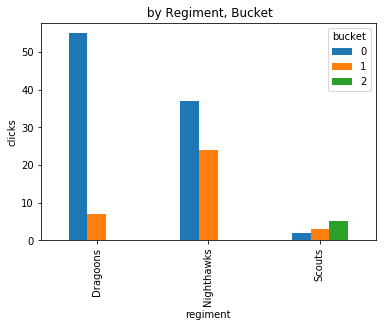

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = {
'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
'bucket': ['0', '1', '0', '0', '1', '1', '0', '0','0', '1', '2', '2'],
'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
'clicks': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
'impressions': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
df = pd.DataFrame(raw_data)

#Group By regiment and bucket
groupbyregimentbucket = df.groupby(['regiment', 'bucket'])

# print "[Grouping by regiment and bucket, and aggregating #of clicks]"
# print groupbyregimentbucket['clicks'].aggregate(np.sum)

#Without the hierarchical indexing
# print "[Unstacking]"
regimentbucketclicksum = groupbyregimentbucket['clicks'].aggregate(np.sum).unstack()
# print regimentbucketclicksum

regimentbucketclicksum.plot(kind = 'bar', title = ' by Regiment, Bucket')
plt.ylabel('clicks')
plt.show()

In [104]:
regimentbucketclicksum

bucket,0,1,2
regiment,,,
Dragoons,55.0,7.0,NaN
Nighthawks,37.0,24.0,NaN
Scouts,2.0,3.0,5.0
